# AR API Stuff

AR's notebook -- follows along with Lars's notebooks.

## Imports

In [2]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize 
import requests
print("Complete")

Complete


## AlphaVantage

Lars's log-in info: lars@kroijer.com / no password / API key: 7I3A5V6DQEWQRQEO

In [13]:
#input ticker below
symbol = "FB"

av_url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey=7I3A5V6DQEWQRQEO"

av_r = requests.get(av_url)
av_data = av_r.json()
av_df = pd.DataFrame.from_dict(av_data["Time Series (Daily)"])
av_df.head(10)

,2018-08-28,2018-08-27,2018-08-24,2018-08-23,2018-08-22,2018-08-21,2018-08-20,2018-08-17,2018-08-16,2018-08-15,...,2018-04-20,2018-04-19,2018-04-18,2018-04-17,2018-04-16,2018-04-13,2018-04-12,2018-04-11,2018-04-10,2018-04-09
1. open,178.1000,175.9900,173.7000,173.0900,172.2100,172.8100,174.0400,174.5000,180.4200,179.3400,...,167.7900,166.2000,166.8800,165.8300,165.7249,164.5800,166.9800,165.3600,157.9300,157.8200
2. high,178.2399,178.6700,174.8200,175.5500,174.2400,174.1700,174.5700,176.2200,180.5000,180.8700,...,168.4300,168.3300,168.1200,169.0000,165.7800,165.7036,167.4500,168.6500,165.9800,160.5300
3. low,176.4700,175.7900,172.9200,172.8300,172.1300,171.3900,170.9100,172.0400,174.0100,174.7800,...,165.8100,165.2000,165.7700,165.6600,163.3900,163.7700,163.1000,163.2500,157.0100,156.0400
4. close,176.9700,177.4600,174.6450,172.9000,173.6400,172.6200,172.5000,173.8000,174.7000,179.5300,...,166.2800,168.1000,166.3600,168.6600,164.8300,164.5200,163.8700,166.3200,165.0400,157.9300
5. volume,5626955,17853274,14631556,18053567,16894083,19578514,21518006,24893176,31351784,33020231,...,19119438,22234961,20969568,22743029,18119435,19990561,38262956,56144633,58947041,34915227


## Quandl

Lars's login info: lars@kroijer.com / lkroijer / API key: FsxyvTxSuRjkzknsUhFe

In [14]:
#input ticker below
ticker = "FB"

q_url = f"https://www.quandl.com/api/v3/datasets/WIKI/{ticker}/data.json?api_key=FsxyvTxSuRjkzknsUhFe"

q_r = requests.get(q_url)
print (q_r.content)

b'{"dataset_data":{"limit":null,"transform":null,"column_index":null,"column_names":["Date","Open","High","Low","Close","Volume","Ex-Dividend","Split Ratio","Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"],"start_date":"2012-05-18","end_date":"2018-03-27","frequency":"daily","data":[["2018-03-27",156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0],["2018-03-26",160.82,161.1,149.02,160.06,125438294.0,0.0,1.0,160.82,161.1,149.02,160.06,125438294.0],["2018-03-23",165.44,167.1,159.02,159.39,52306891.0,0.0,1.0,165.44,167.1,159.02,159.39,52306891.0],["2018-03-22",166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0],["2018-03-21",164.8,173.4,163.3,169.39,105350867.0,0.0,1.0,164.8,173.4,163.3,169.39,105350867.0],["2018-03-20",167.47,170.2,161.95,168.15,128925534.0,0.0,1.0,167.47,170.2,161.95,168.15,128925534.0],["2018-03-19",177.01,177.17,170.06,172.56,86897749.0,0.0,1.0,177.01,177.17,170.06,172.56,86897749.0],[

In [50]:
#input ticker below
ticker = "FB"

q_url = f"https://www.quandl.com/api/v3/datasets/WIKI/{ticker}/data.json?api_key=FsxyvTxSuRjkzknsUhFe"

q_r = requests.get(q_url)
q_data = q_r.json()

column_data = json_normalize(q_data['dataset_data'], 'data')
q_df = column_data

q_df.columns = ["Date","Open","High","Low","Close","Volume","Ex-Dividend","Split Ratio","Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]
q_df.sort_values(by = 'Date', inplace = True)
q_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1471,2012-05-18,42.050,45.0000,38.0000,38.2318,573576400.0,0.0,1.0,42.050,45.0000,38.0000,38.2318,573576400.0
1470,2012-05-21,36.530,36.6600,33.0000,34.0300,168192700.0,0.0,1.0,36.530,36.6600,33.0000,34.0300,168192700.0
1469,2012-05-22,32.610,33.5900,30.9400,31.0000,101786600.0,0.0,1.0,32.610,33.5900,30.9400,31.0000,101786600.0
1468,2012-05-23,31.370,32.5000,31.3600,32.0000,73600000.0,0.0,1.0,31.370,32.5000,31.3600,32.0000,73600000.0
1467,2012-05-24,32.950,33.2100,31.7700,33.0300,50237200.0,0.0,1.0,32.950,33.2100,31.7700,33.0300,50237200.0
1466,2012-05-25,32.900,32.9500,31.1100,31.9100,37149800.0,0.0,1.0,32.900,32.9500,31.1100,31.9100,37149800.0
1465,2012-05-29,31.480,31.6900,28.6500,28.8400,78063400.0,0.0,1.0,31.480,31.6900,28.6500,28.8400,78063400.0
1464,2012-05-30,28.695,29.5500,27.8600,28.1900,57267900.0,0.0,1.0,28.695,29.5500,27.8600,28.1900,57267900.0
1463,2012-05-31,28.545,29.6700,26.8300,29.6000,111639200.0,0.0,1.0,28.545,29.6700,26.8300,29.6000,111639200.0
1462,2012-06-01,28.892,29.1500,27.3900,27.7200,41855500.0,0.0,1.0,28.892,29.1500,27.3900,27.7200,41855500.0


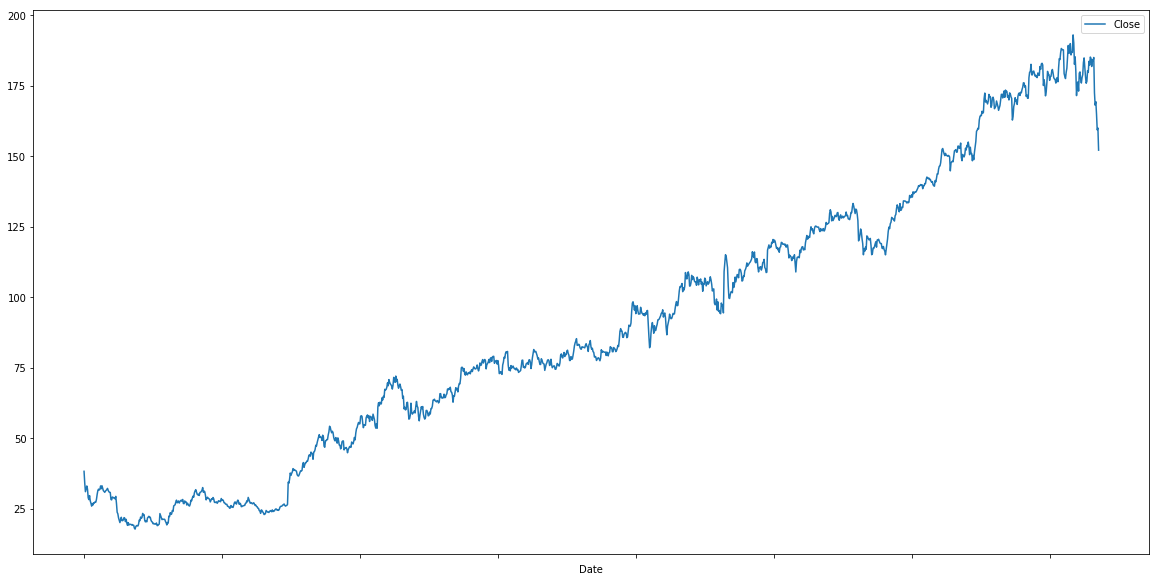

In [51]:
q_df.plot(x = 'Date', y = 'Close', figsize = (20, 10))

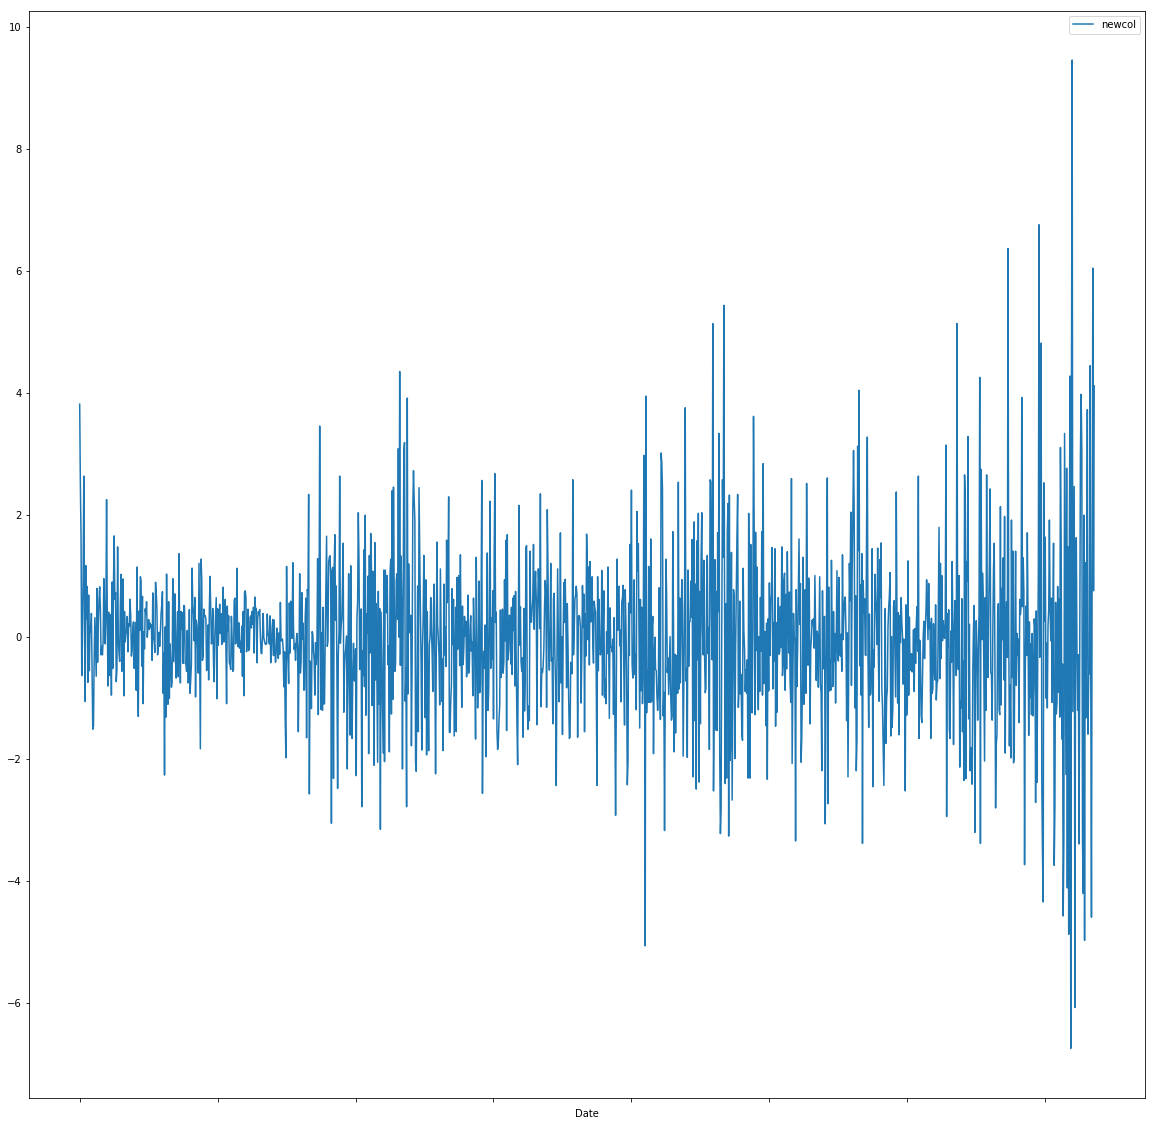

In [54]:
q_df['newcol'] = q_df['Open'] - q_df['Close']
q_df.plot(x = 'Date', y = 'newcol', figsize = (20, 20))